In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Create and assign units to the pool

pool = []

cost1 = []
cost1_units = ["Amumu", "Darius", "Draven", "Irelia", "Lux", "Maddie", "Morgana", "Powder", "Singed", "Steb", "Trundle", "Vex", "Violet", "Zyra"]
for unit in cost1_units:
    for i in range(18):
        cost1.append(unit)

cost2 = []
cost2_units = ["Akali", "Camille", "Leona", "Nocturne", "Rell", "Renata", "Sett", "Tristana", "Urgot", "Vander", "Vladimir", "Zeri", "Ziggs"]
for unit in cost2_units:
    for i in range(18):
        cost2.append(unit)

cost3 = []
cost3_units = ["Blitzcrank", "Cassiopeia", "Ezreal", "Gangplank", "Kogmaw", "Loris", "Nami", "Nunu", "Renni", "Scar", "Smeech", "Swain", "Twisted Fate"]
for unit in cost3_units:
    for i in range(18):
        cost3.append(unit)

cost4 = []
cost4_units = ["Ambessa", "Corki", "Dr Mundo", "Ekko", "Elise", "Garen", "Heimerdinger", "Illaoi", "Silco", "Twitch", "Vi", "Zoe"]
for unit in cost4_units:
    for i in range(18):
        cost4.append(unit)

cost5 = []
cost5_units = ["Caitlyn", "Jayce", "Jinx", "Leblanc", "Malzahar", "Mordekaiser", "Rumble", "Sevika"]
for unit in cost5_units:
    for i in range(9):
        cost5.append(unit)

pool.append(cost1)
pool.append(cost2)
pool.append(cost3)
pool.append(cost4)
pool.append(cost5)

In [3]:
# Chance at Level 7
# 1-cost : 19%
# 2-cost : 30%
# 3-cost : 35%
# 4-cost : 10%
# 5-cost : 1%

def chance_to_get_cost():
    num = random.randint(0, 100)
    if num < 19:
        return 1
    elif num < 49:
        return 2
    elif num < 84:
        return 3
    elif num < 94:
        return 4
    elif 94 <= num < 95:
        return 5
    else:
        return chance_to_get_cost()

def get_unit():
    cost = chance_to_get_cost()
    return f"{cost} {random.choice(pool[cost-1])}"

In [4]:
# Simulation to find jinx

times = 100000
gold_stats = []

for i in range(times):
    gold = 0
    shop_count = 0
    jinx_count = 0
    
    pool[4] = cost5.copy()
    
    while jinx_count < 9:
        unit = get_unit()
        if "Jinx" in unit:
            jinx_count += 1
            shop_count += 1
            pool[4].remove("Jinx")
            if shop_count == 5:
                gold += 2
                shop_count = 0
        else:
            shop_count += 1
            if shop_count == 5:
                gold += 2
                shop_count = 0
            continue
    gold_stats.append(gold)

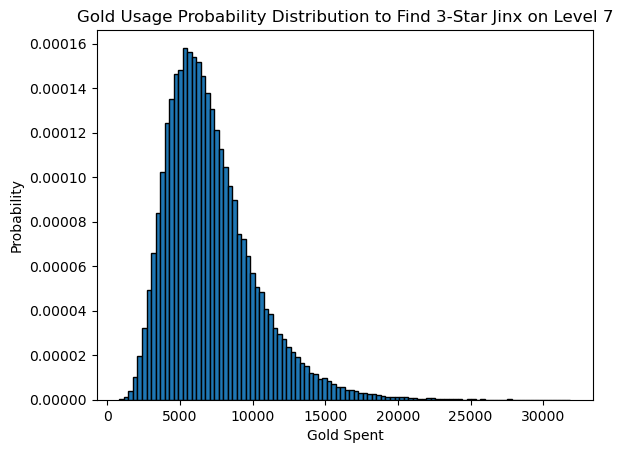

                    Average gold to reroll for 3-Star Jinx : 7111.39286


In [5]:
plt.hist(gold_stats, bins=100, edgecolor='black', density=True)
plt.title("Gold Usage Probability Distribution to Find 3-Star Jinx on Level 7")
plt.xlabel("Gold Spent")
plt.ylabel("Probability")
plt.show()

print(f"                    Average gold to reroll for 3-Star Jinx : {sum(gold_stats)/len(gold_stats)}")